In [1]:
import sys
import json
import warnings

import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sys.path.append('../..')
from matplotlib.colors import LinearSegmentedColormap
from utils import UnimapResult, set_plot_theme, generate_positions

set_plot_theme()
warnings.filterwarnings('ignore')

In [2]:
s_data = sc.read_h5ad('../../data/pbmc9/pbmc9_s.h5ad')
t_data = sc.read_h5ad('../../data/pbmc9/pbmc9_t.h5ad')
s_data.obs['domain'] = 'source'
t_data.obs['domain'] = 'target'
raw_data = sc.concat([s_data, t_data], join='outer')
sc.tl.pca(raw_data, svd_solver='arpack')
sc.pp.neighbors(raw_data, n_neighbors=10, n_pcs=40)
sc.tl.umap(raw_data)

In [3]:
result = UnimapResult('pbmc9', f'unimap/2023', root_dir='../../results', detailed=False)

color_dict = json.load(open('../../color_dict.json'))
batch_c = color_dict["pbmc9_batch"]
ct_c = color_dict["pbmc9_ct_sup"]

In [ ]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()

models = ['raw_data', 'unimap', 'harmony', 'scpoli', 'seurat',  'scalex', 'scgpt', 'portal', 'ingest', 'bbknn', 'code_mmd', 'code_adv']  # 
models_name =  ['Raw Data', 'UniMap', 'Harmony', 'scPoli', 'Seurat v5', 'scalex', 'scGPT', 'portal', 'Ingest', 'bbknn', 'CODE-MMD', 'CODE-ADV']  #  

position1 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.8)
position2 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.6)

for idx, model in enumerate(models):
    model_name = models_name[idx]
    if model == 'raw_data':
        umap1 = raw_data.obsm['X_umap'][:, 0]
        umap2 = raw_data.obsm['X_umap'][:, 1]
        batch_labels = raw_data.obs['batch']
        ct_labels_ref = list(raw_data.obs[raw_data.obs['domain']  ==  'source']['celltype'].apply(lambda x: 'reference (dendritic)' if x == 'dendritic cell' else 'reference (non-dendritic)'))
        celltype_labels = ct_labels_ref + list(raw_data[raw_data.obs.domain == 'target'].obs.celltype) 
        pd_ct_labels = ct_labels_ref + list(raw_data[raw_data.obs.domain == 'target'].obs.celltype) 
    else:
        result = UnimapResult('pbmc9', f'{model}/2023', root_dir='../../results', detailed=False)
        umap1 = result.st_umap_result['umap1']
        umap2 = result.st_umap_result['umap2']
        batch_labels = result.st_result['batch']
        ct_labels_ref = list(result.s_result['celltype'].apply(lambda x: 'reference (dendritic)' if x == 'dendritic cell' else 'reference (non-dendritic)'))
        celltype_labels = ct_labels_ref + list(result.t_result[result.t_result.domain == 'target'].celltype)
        pd_ct_labels = ct_labels_ref + list(result.t_result[result.t_result.domain == 'target'].pred_celltype)


    ax1 = fig.add_axes(position1[idx])
    ax2 = fig.add_axes(position2[idx])
    
    s = 0.05
    p1 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=s, hue=pd_ct_labels, edgecolor='none', palette=ct_c, ax=ax1, rasterized=True)
    p2 = sns.scatterplot(x=umap1, y=umap2, alpha=0.9, s=s, hue=celltype_labels, edgecolor='none', palette=ct_c, ax=ax2, rasterized=True)

    p1 = result.remove_ticks(p1, remove_legend=True)
    p2 = result.remove_ticks(p2, remove_legend=True)
    p1yl = p1.set_ylabel('' if idx != 0 else 'Predicted Results', fontsize=7, labelpad=1)
    p1yl.set_position((0, 0.0))
    p2yl = p2.set_ylabel('' if idx != 0 else 'Ground Truth', fontsize=7, labelpad=1)
    p2yl.set_position((0, 0.0))
    p1.text(0.96, (0.92), model_name, ha='right', va='center', transform=p1.transAxes, fontsize=6)
    p2.text(0.96, (0.92), model_name, ha='right', va='center', transform=p2.transAxes, fontsize=6)

    if idx == len(models) - 1:
        handles, labels = p1.get_legend_handles_labels()
        custom_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=0.2, label=label) for label, color in ct_c.items()]
        p1.legend(handles=custom_handles, loc='center left', bbox_to_anchor=(1, 1), frameon=False, markerscale=12, fontsize=5, labelspacing=0.3, handletextpad=0.2)
        p2.legend(handles=custom_handles, loc='center left', bbox_to_anchor=(1, 1), frameon=False, markerscale=12, fontsize=5, labelspacing=0.3, handletextpad=0.2)



### SUP2

In [5]:
ct = ['B cell', 'T cell', 'alveolar macrophage', 'macrophage', 'mast cell', 'monocyte', 'natural killer cell', 'plasma cell']
pd_ct = ['B cell', 'T cell', 'alveolar macrophage', 'macrophage', 'mast cell', 'monocyte', 'natural killer cell', 'dendritic cell',]

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f4f3f8', '#827fbb'] )

models = ['unimap', 'harmony', 'seurat', 'scpoli',  'scgpt', 'scalex', 'ingest', 'portal', 'bbknn', 'code_mmd', ]

l, b, w, h = 0.0, 0.0, 0.14, 0.14 / (250/185)
# x, y = 0.02, 0.02
position3 = [[0.17, 0.44, w, h], [0.33, 0.44, w, h], [0.49, 0.44, w, h], [0.65, 0.44, w, h], [0.81, 0.44, w, h],
             [0.17, 0.30, w, h], [0.33, 0.30, w, h], [0.49, 0.30, w, h], [0.65, 0.30, w, h], [0.81, 0.30, w, h]]
for idx, model in enumerate(models):
    result = UnimapResult('pbmc9', f'{model}/2023', root_dir='../../results', detailed=False)

    cm = result.get_cm(percentage_direction=0, ct_labels=ct, pd_ct_labels=pd_ct)
    ax = sns.heatmap(cm, annot=True, cmap=custom_cmap, annot_kws={'size': 4}, fmt='.2f', cbar=False, square=True, mask=cm < 0.01, ax=fig.add_axes(position3[idx]), xticklabels=pd_ct, yticklabels=ct)
    # ax = result.remove_spines(ax, remove_legend=False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    title1 = f'{model}'
    ax.text(0.05, 1.05, title1, ha='left', va='center', transform=ax.transAxes, fontdict={'fontsize': 6})

    if idx in (0, 5):
        ax.set_yticklabels(ct, rotation=0, fontsize=6)
        ax.tick_params(bottom=False, top=False, left=True, right=False, length=3, width=0.5)
    if idx in (5,6,7,8,9):
        ax.set_xticklabels(pd_ct, rotation=45, ha='right', fontsize=6)
        ax.tick_params(bottom=True, length=3, width=0.5)
    if idx == 0:
        ylabel = ax.set_ylabel('Ground Truth', fontsize=7, labelpad=10)
        ylabel.set_position((0, -0.12))
    if idx == 7:
        ax.set_xlabel('Predicted Results', fontsize=7, labelpad=10)

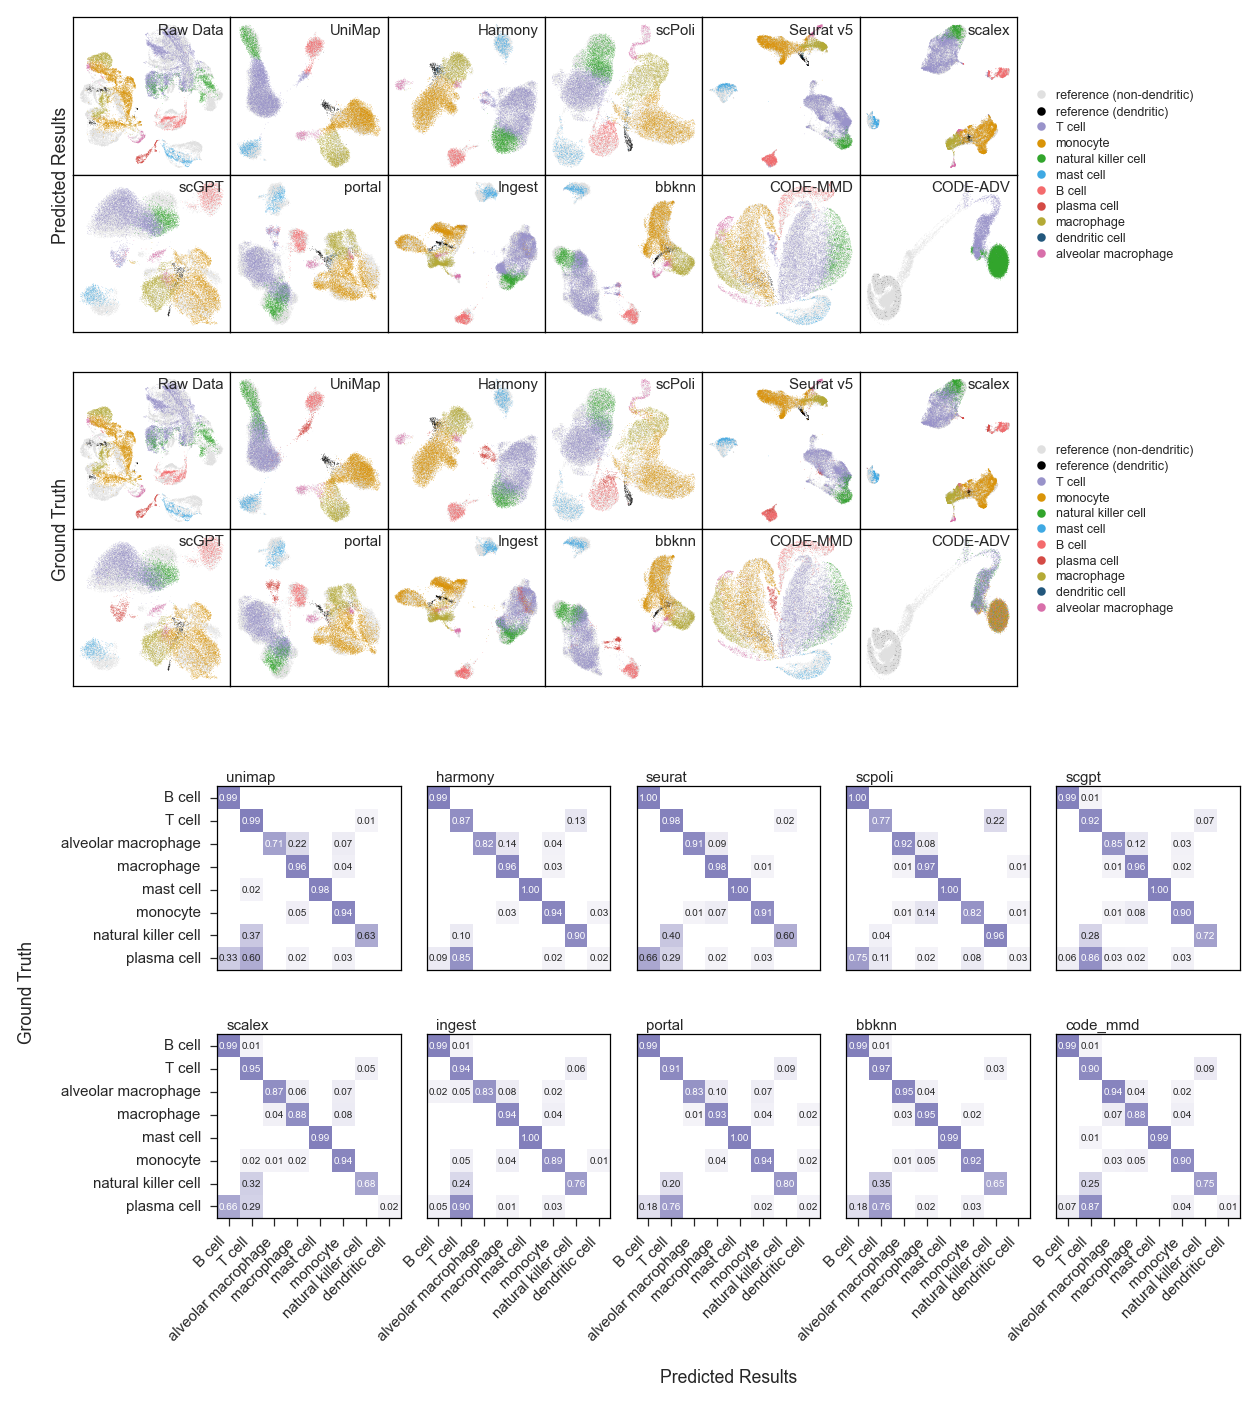

In [6]:
fig

In [7]:
# fig.savefig('../figs/supplementary fig2.pdf', dpi=720)
# fig.savefig('../sup_figs/sup2.png', dpi=720)